In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Configuration
class Config:
    max_vocab_size = 20000
    max_seq_len = 200
    embedding_dim = 128
    hidden_dim = 64
    batch_size = 32
    epochs = 5
    learning_rate = 1e-3

# Load data
file1 = 'C:/Education/ASU/Semester_3/CSE575_SML/Project/Train_Dataset/train_drcat_01.csv'
file2 = 'C:/Education/ASU/Semester_3/CSE575_SML/Project/Train_Dataset/train_drcat_02.csv'
file3 = 'C:/Education/ASU/Semester_3/CSE575_SML/Project/Train_Dataset/train_drcat_03.csv'

# Load each CSV into a DataFrame
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Combine all into one DataFrame
df = pd.concat([df1, df2, df3], ignore_index=True)

# Optional: Shuffle the combined dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

texts = df['text'].astype(str).tolist()
labels = df['label'].tolist()

# Tokenization and padding
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=Config.max_vocab_size, oov_token="<UNK>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=Config.max_seq_len, padding='post')

# Train/Validation split
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

# Keras Model
model = models.Sequential([
    layers.Embedding(Config.max_vocab_size, Config.embedding_dim, input_length=Config.max_seq_len),
    layers.Flatten(),
    layers.Dense(Config.hidden_dim, activation='relu'),
    layers.Dense(2, activation='softmax')  # Binary classification with 2 output units
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=Config.learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training
model.fit(np.array(X_train), np.array(y_train),
          batch_size=Config.batch_size,
          epochs=Config.epochs,
          validation_data=(np.array(X_val), np.array(y_val)))

# Evaluation
preds = np.argmax(model.predict(np.array(X_val)), axis=1)
print("Validation Accuracy:", accuracy_score(y_val, preds))


c:\Users\ysaiv\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
2882/2882 ━━━━━━━━━━━━━━━━━━━━ 73s 25ms/step - accuracy: 0.9722 - loss: 0.0718 - val_accuracy: 0.9967 - val_loss: 0.0128
Epoch 2/5
2882/2882 ━━━━━━━━━━━━━━━━━━━━ 73s 25ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9946 - val_loss: 0.0212
Epoch 3/5
2882/2882 ━━━━━━━━━━━━━━━━━━━━ 72s 25ms/step - accuracy: 0.9989 - loss: 0.0033 - val_accuracy: 0.9967 - val_loss: 0.0210
Epoch 4/5
2882/2882 ━━━━━━━━━━━━━━━━━━━━ 73s 25ms/step - accuracy: 0.9995 - loss: 0.0016 - val_accuracy: 0.9967 - val_loss: 0.0159
Epoch 5/5
2882/2882 ━━━━━━━━━━━━━━━━━━━━ 72s 25ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9969 - val_loss: 0.0193
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Validation Accuracy: 0.9968763557483731


896/896 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.7124

Classification Report:
              precision    recall  f1-score   support

        Real       0.67      0.83      0.74     14331
        Fake       0.77      0.60      0.68     14331

    accuracy                           0.71     28662
   macro avg       0.72      0.71      0.71     28662
weighted avg       0.72      0.71      0.71     28662



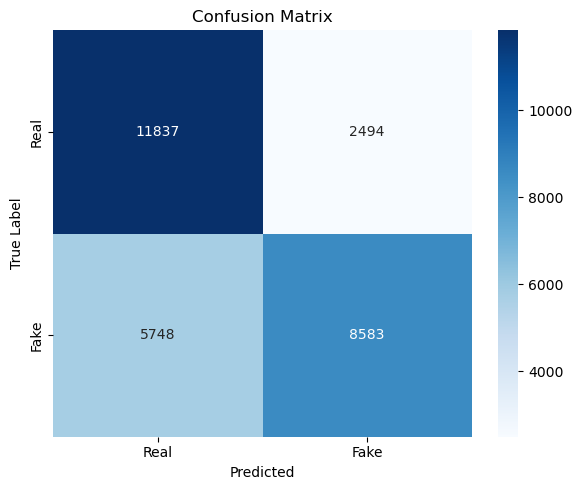

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Load new test data (CSV must have a 'text' column and optionally 'label')
test_df = pd.read_csv("C:/Education/ASU/Semester_3/CSE575_SML/Project/ai-ga-dataset.csv")  # Replace with your file path
texts = test_df["abstract"].astype(str).tolist()

# Tokenize and pad
test_sequences = tokenizer.texts_to_sequences(texts)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=Config.max_seq_len, padding='post'
)

# Predict
probs = model.predict(test_padded)
preds = np.argmax(probs, axis=1)

# Add predictions to DataFrame
test_df["predicted_label"] = preds

# === Evaluation ===
if "label" in test_df.columns:
    true_labels = test_df["label"].tolist()
    
    # Accuracy
    accuracy = accuracy_score(true_labels, preds)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, preds, target_names=["Real", "Fake"]))

    # Confusion matrix
    cm = confusion_matrix(true_labels, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("No 'label' column in test data, skipping evaluation.")


1382/1382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Accuracy: 0.9893

Classification Report:
              precision    recall  f1-score   support

        Real       0.98      1.00      0.99     29792
        Fake       1.00      0.97      0.98     14414

    accuracy                           0.99     44206
   macro avg       0.99      0.98      0.99     44206
weighted avg       0.99      0.99      0.99     44206



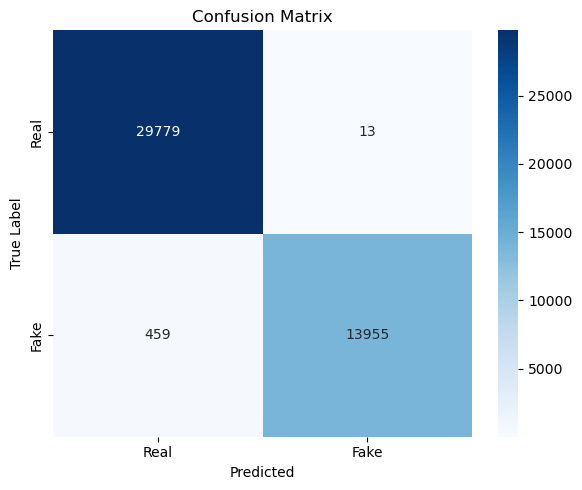

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Load new test data (CSV must have a 'text' column and optionally 'label')
test_df = pd.read_csv("C:/Education/ASU/Semester_3/CSE575_SML/Project/Train_Dataset/train_drcat_04.csv")  # Replace with your file path
texts = test_df["text"].astype(str).tolist()

# Tokenize and pad
test_sequences = tokenizer.texts_to_sequences(texts)
test_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_sequences, maxlen=Config.max_seq_len, padding='post'
)

# Predict
probs = model.predict(test_padded)
preds = np.argmax(probs, axis=1)

# Add predictions to DataFrame
test_df["predicted_label"] = preds

# === Evaluation ===
if "label" in test_df.columns:
    true_labels = test_df["label"].tolist()
    
    # Accuracy
    accuracy = accuracy_score(true_labels, preds)
    print(f"Accuracy: {accuracy:.4f}")
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(true_labels, preds, target_names=["Real", "Fake"]))

    # Confusion matrix
    cm = confusion_matrix(true_labels, preds)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.xlabel("Predicted")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
else:
    print("No 'label' column in test data, skipping evaluation.")